<a href="https://colab.research.google.com/github/DJ1070/Deep_Learning_Handwriting/blob/main/Hand_Writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mnist dataset : https://keras.io/api/datasets/mnist/

In [3]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

**Sample From The Dataset** 

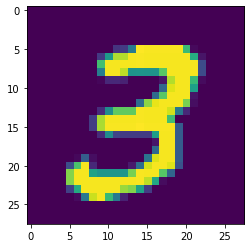

In [4]:
plt.imshow(x_train[7]) # 28 X 28 images

In [5]:
y_train[7]

3

# "Translation" Of The Pictures Into Grayscale Values

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

**Sample Of The First Digit In The Dataset**

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Flatten: Used To Convert N-Dimensional Arrays to 1D-Arrays




In [8]:
model = models.Sequential(
    [
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax' )
    ]
)

# Model Definition With Dropout Rate, Optimizer, sparse_categorical_crossentropy

In [9]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',  # binary_crossentropy, categorical_crossentropy
    metrics = ['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


# Fitting / Training - But Without The Necessary Validation Split 

In [11]:
model.fit(
    x_train, y_train,
    epochs = 50,
    batch_size = 64
)

Epoch 1/50
938/938 [==============================] - 3s 2ms/step - loss: 0.4635 - accuracy: 0.8662
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1105 - accuracy: 0.9658
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0718 - accuracy: 0.9780
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0549 - accuracy: 0.9820
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0390 - accuracy: 0.9873
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0241 - accuracy: 0.9920
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0187 - accuracy: 0.9941

**Loss And Accuracy**

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1735 - accuracy: 0.9806


[0.17351697385311127, 0.9805999994277954]

**Nice, But Not Good Enough Yet.**

# Fitting / Training - Now **With** The Necessary Validation Split

In [13]:
model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 128,
    validation_split = 0.15
)

Epoch 1/20
399/399 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 6.0521e-04 - val_accuracy: 0.9997
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 2.2375e-04 - accuracy: 0.9999 - val_loss: 6.6701e-04 - val_accuracy: 0.9994
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 8.0624e-05 - accuracy: 1.0000 - val_loss: 7.6936e-04 - val_accuracy: 0.9997
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 3.1149e-05 - accuracy: 1.0000 - val_loss: 7.0746e-04 - val_accuracy: 0.9998
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 2.1843e-05 - accuracy: 1.0000 - val_loss: 6.4316e-04 - val_accuracy: 0.9998
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 1.7322e-05 - accuracy: 1.0000 - val_loss: 5.9726e-04 - val_accuracy: 0.9998
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 1.3899e-05 - accuracy: 1.0000 

Running The Model Once More To Show The Results In A Dataframe

In [14]:
history = model.fit(
    x_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.15
)

Epoch 1/10
399/399 [==============================] - 1s 3ms/step - loss: 7.7502e-07 - accuracy: 1.0000 - val_loss: 2.2074e-04 - val_accuracy: 0.9999
Epoch 2/10
399/399 [==============================] - 1s 3ms/step - loss: 6.2956e-07 - accuracy: 1.0000 - val_loss: 1.9909e-04 - val_accuracy: 0.9999
Epoch 3/10
399/399 [==============================] - 1s 3ms/step - loss: 5.0851e-07 - accuracy: 1.0000 - val_loss: 1.9107e-04 - val_accuracy: 0.9999
Epoch 4/10
399/399 [==============================] - 1s 3ms/step - loss: 4.1148e-07 - accuracy: 1.0000 - val_loss: 1.7691e-04 - val_accuracy: 0.9999
Epoch 5/10
399/399 [==============================] - 1s 3ms/step - loss: 3.3285e-07 - accuracy: 1.0000 - val_loss: 1.6434e-04 - val_accuracy: 0.9999
Epoch 6/10
399/399 [==============================] - 1s 3ms/step - loss: 2.6956e-07 - accuracy: 1.0000 - val_loss: 1.5990e-04 - val_accuracy: 0.9999
Epoch 7/10
399/399 [==============================] - 1s 3ms/step - loss: 2.1873e-07 - accuracy: 1.0

In [15]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,7.750241e-07,1.0,0.000221,0.999889
1,6.295626e-07,1.0,0.000199,0.999889
2,5.085111e-07,1.0,0.000191,0.999889
3,4.114832e-07,1.0,0.000177,0.999889
4,3.328536e-07,1.0,0.000164,0.999889
5,2.695603e-07,1.0,0.000160,0.999889
6,2.187272e-07,1.0,0.000138,0.999889
7,1.761989e-07,1.0,0.000126,0.999889
8,1.426153e-07,1.0,0.000111,0.999889
9,1.159782e-07,1.0,0.000111,0.999889


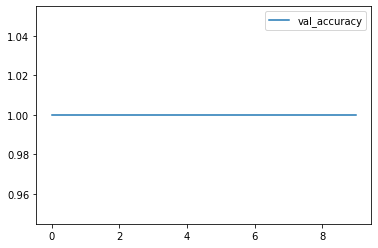

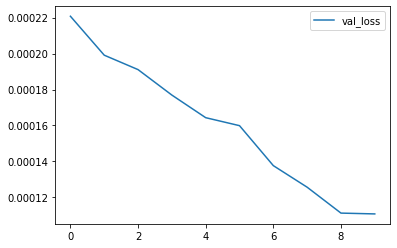

In [16]:
df.plot(y = 'val_accuracy')
df.plot(y = 'val_loss')

In [17]:
y = model.predict(x_test[0:1])

In [18]:
y

array([[8.4760835e-31, 3.4150420e-18, 9.7804332e-23, 2.9030873e-19,
        1.0975609e-22, 1.1216485e-30, 4.5540220e-29, 1.0000000e+00,
        1.9037611e-26, 1.6150297e-18]], dtype=float32)

In [19]:
y.shape

(1, 10)

In [20]:
tf.argmax(y, axis=-1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

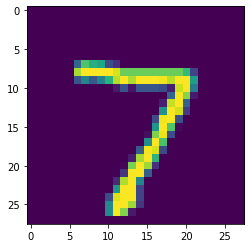

In [21]:
plt.imshow(x_test[0])

# Now With CallBacks: Callbacks Prevent The System From "Overlearning" Which Leads To Worse Results And An Excess Of Computing Ressources

In [22]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

model.fit(
    x_train, y_train,
    epochs = 30,
    batch_size = 128,
    validation_split = .15,
    callbacks = [EarlyStopping(patience= 3)]
)

Epoch 1/30
399/399 [==============================] - 1s 3ms/step - loss: 9.3780e-08 - accuracy: 1.0000 - val_loss: 9.3000e-05 - val_accuracy: 1.0000
Epoch 2/30
399/399 [==============================] - 1s 3ms/step - loss: 7.5744e-08 - accuracy: 1.0000 - val_loss: 8.4364e-05 - val_accuracy: 1.0000
Epoch 3/30
399/399 [==============================] - 1s 3ms/step - loss: 6.1668e-08 - accuracy: 1.0000 - val_loss: 7.5421e-05 - val_accuracy: 1.0000
Epoch 4/30
399/399 [==============================] - 1s 3ms/step - loss: 5.0115e-08 - accuracy: 1.0000 - val_loss: 7.0557e-05 - val_accuracy: 1.0000
Epoch 5/30
399/399 [==============================] - 1s 3ms/step - loss: 4.0781e-08 - accuracy: 1.0000 - val_loss: 6.4806e-05 - val_accuracy: 1.0000
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 3.3238e-08 - accuracy: 1.0000 - val_loss: 6.0644e-05 - val_accuracy: 1.0000
Epoch 7/30
399/399 [==============================] - 1s 3ms/step - loss: 2.7133e-08 - accuracy: 1.0

**The System Stopped "Learning" After The Results Didn't Grow Better For 3 Epochs ("Patience = 3")**

In [23]:
#callbacks = [tf.keras.callbacks.EarlyStopping()]  patience 
# Arguments: 1) patience = 0 (def), 2) monitor = 'val_loss' (default) 3) min_delta = 0.01 (measure of improvement), 4) mode = 'auto'. 

# ModelCheckpoint Returns To The Kept Best Result After A Defined Number Of "Patiences"

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'hamdwriting/model_weights'
checkpoint = ModelCheckpoint(filepath = path,
                             frequency = 'epoch',
                             save_weights_only = True,
                             save_best_only = True,
                             verbose =1
                          )

model.fit(
    x_train, y_train,
    epochs = 15,
    batch_size = 128,
    validation_split = .15,
    callbacks = [EarlyStopping(patience= 2), checkpoint]


)

Epoch 1/15
399/399 [==============================] - 1s 3ms/step - loss: 5.3995e-10 - accuracy: 1.0000 - val_loss: 2.1381e-05 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00002, saving model to hamdwriting/model_weights
Epoch 2/15
399/399 [==============================] - 1s 3ms/step - loss: 4.6982e-10 - accuracy: 1.0000 - val_loss: 2.1014e-05 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.00002 to 0.00002, saving model to hamdwriting/model_weights
Epoch 3/15
399/399 [==============================] - 1s 3ms/step - loss: 4.2074e-10 - accuracy: 1.0000 - val_loss: 2.0524e-05 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00002 to 0.00002, saving model to hamdwriting/model_weights
Epoch 4/15
399/399 [==============================] - 1s 3ms/step - loss: 3.9035e-10 - accuracy: 1.0000 - val_loss: 2.0062e-05 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.00002 to 0.00002, saving model to hamdwriting/model_weights
Epoch 5/

**The 3rd Epoch Brought The Best Results With The val_loss < 5. With patience = 2 The Computing Was Stopped After The 5th Epoch.** 

In [25]:
! ls hamdwriting

checkpoint  model_weights.data-00000-of-00001  model_weights.index


In [26]:
! model_weights.data-00000-of-00001

/bin/bash: model_weights.data-00000-of-00001: command not found


In [27]:
model.load_weights(path)

# Already Saved Model In Tensorflow: Transfer Learning

In [28]:
from tensorflow.keras.applications import InceptionV3

In [29]:
model = InceptionV3()

In [30]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________